In [1]:
from sklearn import datasets
X,y = datasets.make_blobs(100,2,centers=2,random_state=1701,cluster_std=2)

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

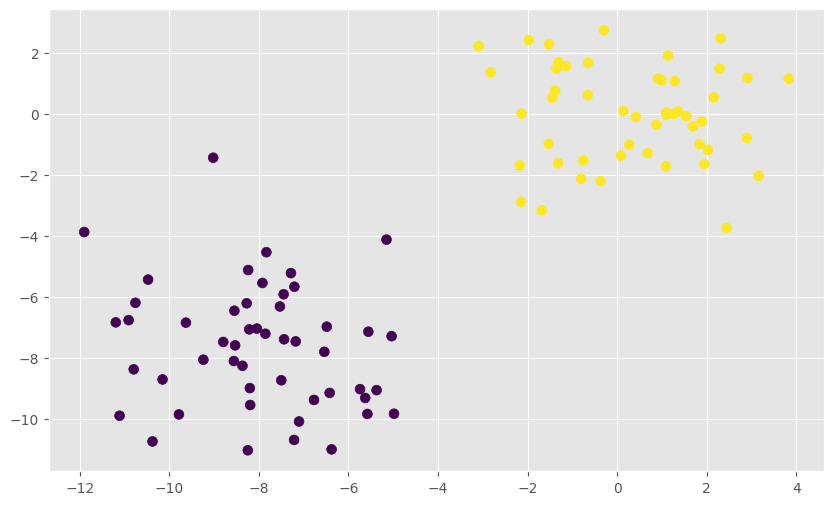

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50);

In [4]:
import numpy as np
from sklearn import model_selection as ms
X_train, X_test,y_train,y_test = ms.train_test_split(
X.astype(np.float32),y,test_size=0.1
)

In [5]:
%pip install opencv-python

     -------------------------------------- 35.6/35.6 MB 723.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
model_norm = cv2.ml.NormalBayesClassifier_create()

In [7]:
model_norm.train(X_train,cv2.ml.ROW_SAMPLE,y_train)

True

In [8]:
_,y_pred = model_norm.predict(X_test)

In [9]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

1.0

In [10]:
def plot_decision_boundary(model,X_test,y_test):
    #create a mesh to plot in
    h = 0.02 # step size in mesh
    x_min,x_max = X_test[:,0].min()-1,X_test[:,0].max()+1
    y_min,y_max = X_test[:,1].min()-2,X_test[:,1].max()+1
    xx,yy = np.meshgrid(np.arrange(x_min, x_max,h),
                       np.arrange(y_min,y_max,h))
    X_hypo = np.column_stack((xx.ravel().astype(np.float32),
                             yy.ravel().astype(np.float32)))
    ret = model.predict(X_hypo)
    if isinstance(ret,tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx,yy,zz,cmap=plt.cm.coolwarm,alpha=0.8)
    plt.scatter(X_test[:,0],X_test[:,1],c=y_test,s=200)

In [11]:
ret,y_pred, y_proba = model_norm.predictProb(X_test)

In [13]:
y_proba.round(2)

array([[0.13, 0.  ],
       [0.  , 0.02],
       [0.08, 0.  ],
       [0.  , 0.31],
       [0.  , 0.06],
       [0.11, 0.  ],
       [0.  , 0.19],
       [0.  , 0.34],
       [0.02, 0.  ],
       [0.  , 0.29]], dtype=float32)